<IPython.core.display.Javascript object>


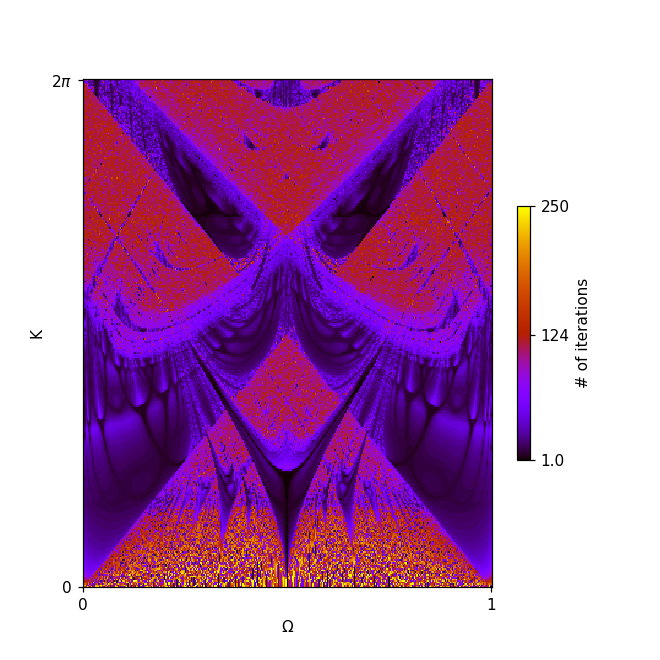

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator


def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def get_theta_o(theta_o, omega, K):
    theta_start = []
    theta_start.append(theta_o)
    for i in range(100):
        theta_start.append(circle(theta_start[-1], omega, K))
    return theta_start

def wind(theta_o, omega, K):
    e = .003
    nn = []
    theta_start = get_theta_o(theta_o, omega,K)
    for i in range(len(theta_start)):
        theta = theta_start[i]
        theta_curr = theta + 2*e
        n = 0
        while abs(theta_curr  - theta_start[i]) > e and n < 250:
            theta = circle(theta, omega, K)
            theta_curr = theta
            n += 1
        nn.append(n)
    #print('---------')
    return np.mean(nn)

def getwind(OMEGA, K, W, theta_o):
    for i in range(len(K)):
        for j in range(len(K[0])):
            k = K[i][j]
            omega = OMEGA[i][j]
            W[i][j] = wind(theta_o, omega, k)
            #print('done')
    return W            
            
theta_o = .5

dx = .003
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
OMEGA, K = np.meshgrid(x,y)
W = OMEGA*0.0 
W = getwind(OMEGA, K, W, theta_o)

minW = np.min(W)
maxW = np.max(W)
KK=K*2*np.pi


f, ax = plt.subplots(figsize=(6,6))
cc = ax.pcolormesh(OMEGA,KK,W, cmap ='gnuplot')

ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.xaxis.set_major_locator(MultipleLocator(base=1))

cbar = f.colorbar(cc, ax=ax, shrink = .5)
plt.xlabel('$\Omega$')
plt.ylabel('K')
cbar.set_label('# of iterations')
cbar.set_ticks([minW, int((maxW-minW)/2) ,int(maxW)])
cbar.set_ticklabels([minW, int((maxW-minW)/2), int(maxW)])
plt.savefig('Arnold.png')


